In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scqubits
from functools import partial
import qutip
import concurrent
from loky import get_reusable_executor
import numpy as np
import qutip
import scqubits
from typing import List, Union,Any

from CoupledQuantumSystems.qobj_manip import *
from CoupledQuantumSystems.drive import *
from CoupledQuantumSystems.evo import ODEsolve_and_post_process
from CoupledQuantumSystems.noise import *
from CoupledQuantumSystems.qobj_manip import *
from CoupledQuantumSystems.IFQ import gfIFQ


In [3]:
from scipy.optimize import minimize

EJ = 4
EC = EJ/2.7
EL = EJ/45

qbt = gfIFQ(EJ = EJ,EC =EC,EL = EL,truncated_dim=20)

temp_in_mK = 20
loss_tangent_ref = 5e-6
one_over_f_flux_noise_amplitude = 1e-6

c_ops=qbt.get_T1_c_ops(temp_in_mK,
                        loss_tangent_ref,
                        one_over_f_flux_noise_amplitude)
e_ops = [qutip.ket2dm(qutip.basis(qbt.truncated_dim, i)) for i in range(12)]


 /tmp/ipykernel_433710/3493457573.py: 38

In [4]:
from IPython.display import clear_output

t_duration = 50
tlist = np.linspace(0,t_duration,t_duration)
detuning = 0.2

[1.58883385, 1.84170331]


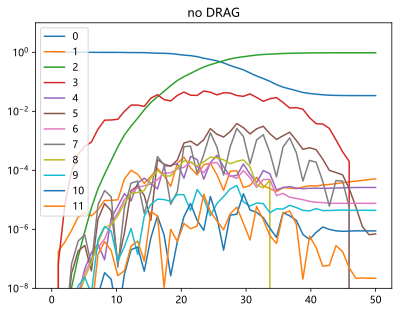

In [5]:
x =[1.58883385, 1.84170331]

amp1_scaling_factor = x[0]
amp2_scaling_factor = x[1]
results  = qbt.run_qutip_mesolve_parrallel(
    initial_states = [qutip.basis(qbt.truncated_dim, 0),qutip.basis(qbt.truncated_dim, 2)],
    tlist = tlist,
    drive_terms = qbt.get_Raman_drive_terms(
        i = 0,
        j = 3,
        k = 2,
        detuning=detuning,
        t_duration=t_duration,
        shape='sin^2',
        amp_scaling_factor = 1,
        amp1_scaling_factor = amp1_scaling_factor,
        amp2_scaling_factor = amp2_scaling_factor
    ),
    c_ops = c_ops,
    e_ops = e_ops
)
clear_output()
print(x)
for i, exp in enumerate(results[0].expect):
    plt.plot(tlist,exp,label= f"{i}")
plt.legend()
plt.yscale('log')
plt.ylim(1e-8,1e1)
plt.title("no DRAG")
plt.show()



[1.81098677 1.77093644 0.0964966  0.10272517]


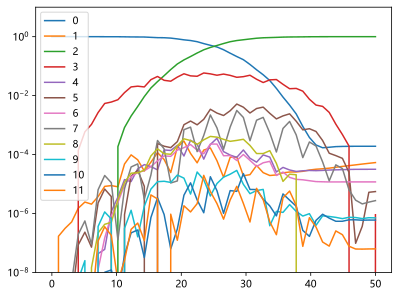

(0.00027360759499195364, 0.0002749056665541927)


In [10]:
def objective(x):
    amp1_scaling_factor = x[0]
    amp2_scaling_factor = x[1]
    amp1_correction_scaling_factor = x[2]
    amp2_correction_scaling_factor = x[3]
    results  = qbt.run_qutip_mesolve_parrallel(
        initial_states = [qutip.basis(qbt.truncated_dim, 0),qutip.basis(qbt.truncated_dim, 2)],
        tlist = tlist,
        drive_terms = qbt.get_Raman_DRAG_drive_terms(
            i = 0,
            j = 3,
            k = 2,
            detuning=detuning,
            t_duration=t_duration,
            shape='sin^2',
            amp_scaling_factor = 1,
            amp1_scaling_factor = amp1_scaling_factor,
            amp2_scaling_factor = amp2_scaling_factor,
            amp1_correction_scaling_factor = amp1_correction_scaling_factor,
            amp2_correction_scaling_factor = amp2_correction_scaling_factor,
        ),
        c_ops = c_ops,
        e_ops = e_ops
    )
    clear_output()
    print(x)
    for i, exp in enumerate(results[0].expect):
        plt.plot(tlist,exp,label= f"{i}")
    plt.legend()
    plt.yscale('log')
    plt.ylim(1e-8,1e1)
    plt.show()
    
    one_minus_pop2 = 1-results[0].expect[2][-1]
    one_minus_pop0 = 1-results[1].expect[0][-1]
    print((one_minus_pop2, one_minus_pop0))
    return one_minus_pop2 + one_minus_pop0

initial_guess = [1.58883385, 1.84170331,0.1,0.1]

result = minimize(objective, initial_guess, method='Nelder-Mead')


[1.81098677, 1.77093644, 0.0964966, 0.10272517]


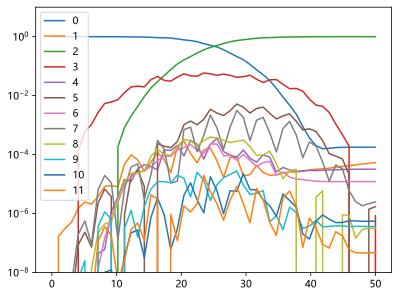

(0.00028078234713091454, 0.00023808231947319847)


In [12]:
from scipy.optimize import minimize

EJ = 4
EC = EJ/2.7
EL = EJ/45

qbt = gfIFQ(EJ = EJ,EC =EC,EL = EL,truncated_dim=30)

temp_in_mK = 20
loss_tangent_ref = 5e-6
one_over_f_flux_noise_amplitude = 1e-6

c_ops=qbt.get_T1_c_ops(temp_in_mK,
                        loss_tangent_ref,
                        one_over_f_flux_noise_amplitude)
e_ops = [qutip.ket2dm(qutip.basis(qbt.truncated_dim, i)) for i in range(12)]


x = [1.81098677, 1.77093644 ,0.0964966,  0.10272517]


amp1_scaling_factor = x[0]
amp2_scaling_factor = x[1]
amp1_correction_scaling_factor = x[2]
amp2_correction_scaling_factor = x[3]
results  = qbt.run_qutip_mesolve_parrallel(
    initial_states = [qutip.basis(qbt.truncated_dim, 0),qutip.basis(qbt.truncated_dim, 2)],
    tlist = tlist,
    drive_terms = qbt.get_Raman_DRAG_drive_terms(
        i = 0,
        j = 3,
        k = 2,
        detuning=detuning,
        t_duration=t_duration,
        shape='sin^2',
        amp_scaling_factor = 1,
        amp1_scaling_factor = amp1_scaling_factor,
        amp2_scaling_factor = amp2_scaling_factor,
        amp1_correction_scaling_factor = amp1_correction_scaling_factor,
        amp2_correction_scaling_factor = amp2_correction_scaling_factor,
    ),
    c_ops = c_ops,
    e_ops = e_ops
)
clear_output()
print(x)
for i, exp in enumerate(results[0].expect):
    plt.plot(tlist,exp,label= f"{i}")
plt.legend()
plt.yscale('log')
plt.ylim(1e-8,1e1)
plt.show()

one_minus_pop2 = 1-results[0].expect[2][-1]
one_minus_pop0 = 1-results[1].expect[0][-1]
print((one_minus_pop2, one_minus_pop0))

[1.81098677, 1.77093644, 0.0964966, 0.10272517]


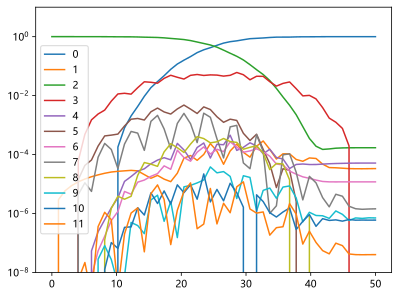

(0.00028078234713091454, 0.00023808231947319847)


In [5]:
for i, exp in enumerate(results[1].expect):
    plt.plot(tlist,exp,label= f"{i}")
plt.legend()
plt.yscale('log')
plt.ylim(1e-8,1e1)
plt.show()